# Numeric Preprocessing (with built-in)

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10.0,101,76.0,48.0,180.0,32.9,0.171,63,0
765,2.0,122,70.0,27.0,0.0,36.8,0.340,27,0
766,5.0,121,72.0,23.0,112.0,26.2,0.245,30,0
767,1.0,126,60.0,0.0,0.0,30.1,0.349,47,1


In [2]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116,74.0,NaN,0.0,25.6,0.201,30,0
6,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0
7,3.0,78,50.0,32.0,88.0,31.0,0.248,26,1
8,10.0,115,0.0,0.0,0.0,35.3,0.134,29,0
9,2.0,197,70.0,45.0,543.0,30.5,0.158,53,1


In [3]:
df.shape

(769, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,769.000000,768.000000,768.000000,768.000000,769.000000,769.000000,769.000000,769.000000
mean,3.846354,120.847854,69.191406,20.574219,79.799479,31.985566,0.471719,33.237971,0.348505
std,3.368283,31.978003,19.194430,15.937859,115.244002,7.881425,0.331142,11.752850,0.476807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#seperate features and class label
features = df.iloc[:, :-1]
class_label = df.iloc[:, -1]

In [11]:
def find_duplicates(data):
    duplicate_rows = data[data.duplicated()]
    return duplicate_rows

duplicate_values = find_duplicates(features)
print("Duplicates values:")
print(duplicate_values)

Duplicates values:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
6          1.0       85           66.0           29.0      0.0  26.6   

   DiabetesPedigreeFunction  Age  
6                     0.351   31  


In [12]:
def remove_duplicates(data):
    unique_data = data.drop_duplicates()
    return unique_data

features = remove_duplicates(features)
print("Data after removing duplicates :")
print(features)

Data after removing duplicates :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0      148           72.0           35.0      0.0  33.6   
1            1.0       85           66.0           29.0      0.0  26.6   
2            8.0      183           64.0            0.0      0.0  23.3   
3            1.0       89           66.0           23.0     94.0  28.1   
4            NaN      137           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
764         10.0      101           76.0           48.0    180.0  32.9   
765          2.0      122           70.0           27.0      0.0  36.8   
766          5.0      121           72.0           23.0    112.0  26.2   
767          1.0      126           60.0            0.0      0.0  30.1   
768          1.0       93           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1   

In [13]:
def find_number_of_missing_values(data): 
    missing_values = data.isnull().sum()

    # Filter out columns with missing values
    missing_values = missing_values[missing_values > 0]
    return missing_values

missing_values = find_number_of_missing_values(features)
# Print columns with missing values and their respective counts
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Pregnancies      1
BloodPressure    1
SkinThickness    1
Insulin          1
dtype: int64


In [14]:
# 1. Handling missing values
def handle_missing_values(data, strategy='mean'):
    if strategy == 'mean':
        return data.fillna(data.mean())
                    
    elif strategy == 'max':
        return data.fillna(data.max())
                    
    elif strategy == 'min':
        return data.fillna(data.min())
    
    elif strategy == 'zero':
        return data.fillna(0)
    
    elif strategy == 'drop':
        return data.dropna()

features = handle_missing_values(features)
print("Data after handling missing values:")
print(features)

Data after handling missing values:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0       6.000000      148           72.0           35.0      0.0  33.6   
1       1.000000       85           66.0           29.0      0.0  26.6   
2       8.000000      183           64.0            0.0      0.0  23.3   
3       1.000000       89           66.0           23.0     94.0  28.1   
4       3.850065      137           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
764    10.000000      101           76.0           48.0    180.0  32.9   
765     2.000000      122           70.0           27.0      0.0  36.8   
766     5.000000      121           72.0           23.0    112.0  26.2   
767     1.000000      126           60.0            0.0      0.0  30.1   
768     1.000000       93           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

# Numeric Preprocessing (without built-in)

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
765,10.0,101,76.0,48.0,180.0,32.9,0.171,63,0
766,2.0,122,70.0,27.0,0.0,36.8,0.340,27,0
767,5.0,121,72.0,23.0,112.0,26.2,0.245,30,0
768,1.0,126,60.0,0.0,0.0,30.1,0.349,47,1


In [2]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,33,1
5,6.0,148,72.0,35.0,0.0,33.6,0.627,50,1
6,5.0,116,74.0,NaN,0.0,25.6,0.201,30,0
7,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0
8,3.0,78,50.0,32.0,88.0,31.0,0.248,26,1
9,10.0,115,0.0,0.0,0.0,35.3,0.134,29,0


In [3]:
df.shape

(770, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,770.000000,769.000000,769.000000,769.000000,770.000000,770.000000,770.00000,770.000000
mean,3.849155,120.883117,69.195059,20.592978,79.695709,31.987662,0.471921,33.25974,0.349351
std,3.366985,31.972182,19.182197,15.935972,115.204894,7.876514,0.330973,11.76073,0.477075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.00000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.244000,24.00000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.372500,29.00000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,127.000000,36.575000,0.626750,41.00000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.00000,1.000000


In [5]:
#seperate features and class label
features = df.iloc[:, :-1]
class_label = df.iloc[:, -1]

In [6]:
import pandas as pd

def find_duplicates(data):
    duplicate_rows = []
    seen_rows = set()  # To track rows that we have already seen

    # Iterate through each row in the DataFrame
    for index, row in data.iterrows():
        # Convert the row to a tuple to make it hashable
        row_tuple = tuple(row)
        
        # Check if this row tuple has already been seen
        if row_tuple in seen_rows:
            # Append the duplicate row as a Series object
            duplicate_rows.append(row)
        else:
            seen_rows.add(row_tuple)  # Add the row tuple to the set of seen rows
    
    # Create a DataFrame from the list of duplicate rows
    columns = data.columns
    duplicate_df = pd.DataFrame(duplicate_rows, columns=columns)
    
    return duplicate_df


duplicate_values = find_duplicates(features)
print("Duplicates values:")
print(duplicate_values)

Duplicates values:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
5          6.0    148.0           72.0           35.0      0.0  33.6   
7          1.0     85.0           66.0           29.0      0.0  26.6   

   DiabetesPedigreeFunction   Age  
5                     0.627  50.0  
7                     0.351  31.0  


In [7]:
def remove_duplicates(data):
    seen_rows = set()
    unique_data = []
    
    for index, row in data.iterrows():
        row_tuple = tuple(row)
        if row_tuple not in seen_rows:
            seen_rows.add(row_tuple)
            unique_data.append(row)
    
    # Convert list of rows back to DataFrame
    unique_data_df = pd.DataFrame(unique_data, columns=data.columns)
    return unique_data_df

features = remove_duplicates(features)
print("Data after removing duplicates :")
print(features)

Data after removing duplicates :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            NaN    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
765         10.0    101.0           76.0           48.0    180.0  32.9   
766          2.0    122.0           70.0           27.0      0.0  36.8   
767          5.0    121.0           72.0           23.0    112.0  26.2   
768          1.0    126.0           60.0            0.0      0.0  30.1   
769          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1 

In [8]:
features.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33.0
6,5.0,116.0,74.0,NaN,0.0,25.6,0.201,30.0
8,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0
9,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
10,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0
11,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0


In [9]:
 def find_number_of_missing_values(data): 
    # Create an empty dictionary to store column names and their respective counts of missing values
    missing_values = {}

    # Iterate through each column in the DataFrame
    for column in data.columns:
        # Count the number of missing values in the column
        missing_count = sum(1 for value in data[column] if pd.isna(value))

        # If there are missing values in the column, add it to the dictionary
        if missing_count > 0:
            missing_values[column] = missing_count

    # Print columns with missing values and their respective counts
    print("Columns with missing values:")
    for column, count in missing_values.items():
        print(f"{column}: {count}")

missing_values = find_number_of_missing_values(features)

Columns with missing values:
Pregnancies: 1
BloodPressure: 1
SkinThickness: 1
Insulin: 1


In [10]:
import pandas as pd
import numpy as np

def handle_missing_values(data, strategy='mean'):
    num_cols = data.shape[1]  # Number of columns
    filled_data = data.copy()  # Create a copy to modify
    
    if strategy == 'mean':
        # Calculate column means
        col_means = [np.mean(data.iloc[:, col]) for col in range(num_cols)]
        
        # Replace NaN values with column means
        for col in range(num_cols):
            col_mean = col_means[col]
            for row in range(len(data)):
                if pd.isna(data.iloc[row, col]):
                    filled_data.iloc[row, col] = col_mean
                    
    elif strategy == 'max':
        # Calculate column max values
        col_max = [np.max(data.iloc[:, col]) for col in range(num_cols)]
        
        # Replace NaN values with column max values
        for col in range(num_cols):
            col_max_value = col_max[col]
            for row in range(len(data)):
                if pd.isna(data.iloc[row, col]):
                    filled_data.iloc[row, col] = col_max_value
                    
    elif strategy == 'min':
        # Calculate column min values
        col_min = [np.min(data.iloc[:, col]) for col in range(num_cols)]
        
        # Replace NaN values with column min values
        for col in range(num_cols):
            col_min_value = col_min[col]
            for row in range(len(data)):
                if pd.isna(data.iloc[row, col]):
                    filled_data.iloc[row, col] = col_min_value
                    
    elif strategy == 'zero':
        # Replace NaN values with 0
        for col in range(num_cols):
            for row in range(len(data)):
                # Check if the value is NaN
                if pd.isna(data.iloc[row, col]):
                    # If it is NaN, replace it with 0
                    filled_data.iloc[row, col] = 0
    
    elif strategy == 'drop':
        # Drop rows with NaN values
        filled_data = data.dropna()
    
    return filled_data

features = handle_missing_values(features, 'max')
print("Data after handling missing values:")
print(features)

Data after handling missing values:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4           17.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
765         10.0    101.0           76.0           48.0    180.0  32.9   
766          2.0    122.0           70.0           27.0      0.0  36.8   
767          5.0    121.0           72.0           23.0    112.0  26.2   
768          1.0    126.0           60.0            0.0      0.0  30.1   
769          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  

# Naive Bayes 

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv('Social_Network_Ads.csv')

In [14]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [15]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB(priors=[0.4, 0.6], var_smoothing=1e-9)
classifier.fit(X_train, y_train)

GaussianNB(priors=[0.4, 0.6])

In [17]:
#changing hyperparameter values
from sklearn.naive_bayes import GaussianNB

# Example hyperparameter values
custom_priors = [0.3, 0.7]  # Custom priors for classes
custom_var_smoothing = 1e-8  # Custom var_smoothing value

# Initialize Gaussian Naive Bayes classifier with custom hyperparameters
classifier = GaussianNB(priors=custom_priors, var_smoothing=custom_var_smoothing)

# Assuming X_train and y_train are your training data
classifier.fit(X_train, y_train)


GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-08)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [21]:
cm

array([[53, 15],
       [ 1, 31]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
print("The accuracy score is:", accuracy_score(y_pred, y_test))

The accuracy score is: 0.84


In [23]:
from sklearn.metrics import classification_report
print("classification_report:")
print( classification_report(y_pred, y_test))

classification_report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        54
           1       0.97      0.67      0.79        46

    accuracy                           0.84       100
   macro avg       0.87      0.83      0.83       100
weighted avg       0.87      0.84      0.83       100



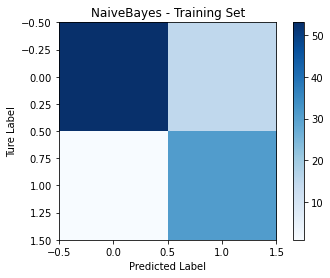

In [24]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('NaiveBayes - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('Ture Label')
plt.colorbar()

# Show the plot
plt.show()

# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# converting gender column to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
dataset['Gender']=label_encoder.fit_transform(dataset['Gender'])
dataset['Gender'].unique()

array([1, 0])

In [4]:
# to include gender
X = dataset.iloc[:, [1, 3]].values
y = dataset.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
# X = dataset.iloc[:, [2, 3]].values
# y = dataset.iloc[:,4].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [14]:
cm

array([[66,  2],
       [19, 13]], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
print("The accuracy score is:", accuracy_score(y_pred, y_test))

The accuracy score is: 0.79


In [16]:
from sklearn.metrics import classification_report
print("classification_report:")
print( classification_report(y_pred, y_test))

classification_report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86        85
           1       0.41      0.87      0.55        15

    accuracy                           0.79       100
   macro avg       0.69      0.82      0.71       100
weighted avg       0.89      0.79      0.82       100



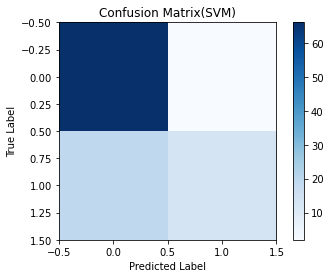

In [17]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Confusion Matrix(SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.colorbar()

# Show the plot
plt.show()

# Decision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [4]:
y_pred = classifier.predict(X_test)

In [5]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [7]:
cm

array([[62,  6],
       [ 4, 28]], dtype=int64)

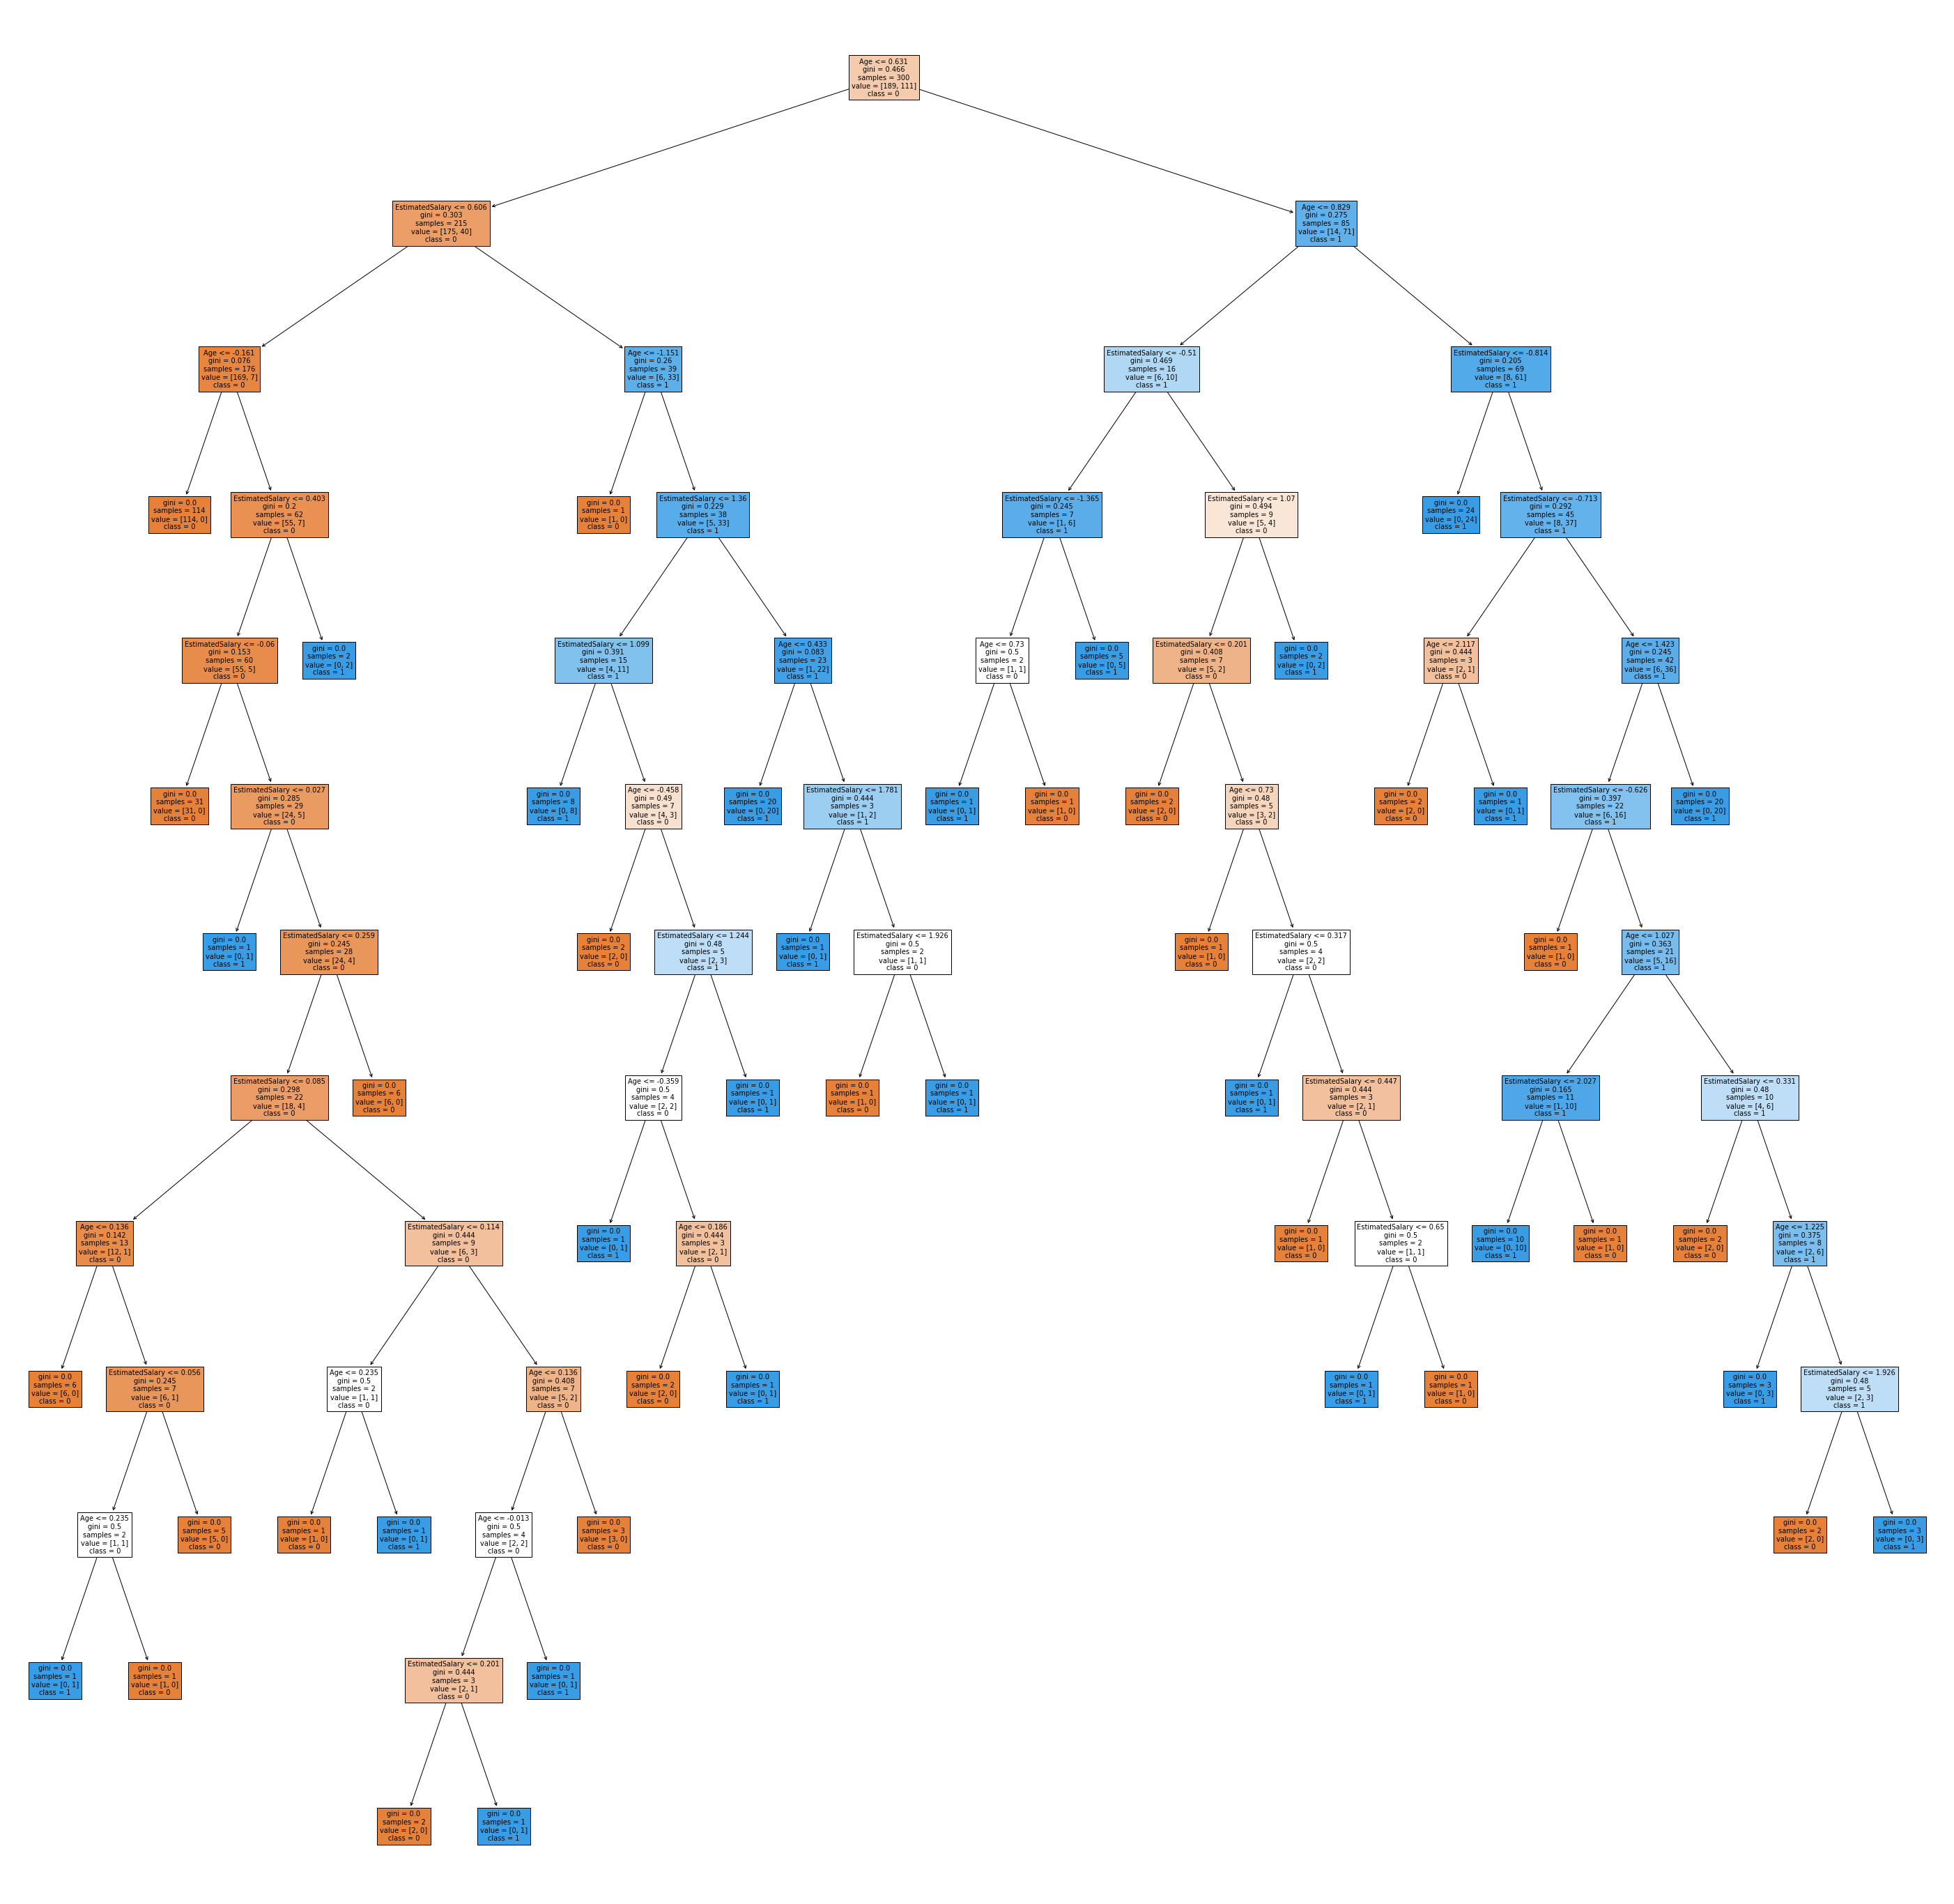

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(classifier, feature_names=['Age', 'EstimatedSalary'], class_names=['0', '1'], filled=True)
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
print("The accuracy score is:", accuracy_score(y_pred, y_test))

The accuracy score is: 0.9


# k- means

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clustering.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


     LoanAmount  ApplicantIncome
0         128.0             4583
1          66.0             3000
2         120.0             2583
3         141.0             6000
4          95.0             2333
..          ...              ...
376       128.0             5703
377       108.0             3232
378        71.0             2900
379        40.0             4106
380       133.0             4583

[381 rows x 2 columns]


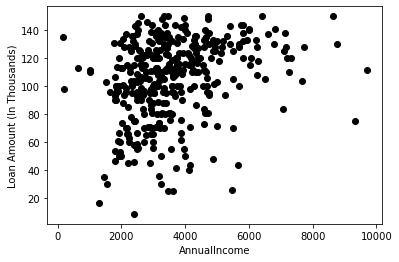

In [3]:
X = data[["LoanAmount","ApplicantIncome"]]
print(X)
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

     LoanAmount  ApplicantIncome
161       128.0             4931
203       112.0             3541
11         76.0             3510


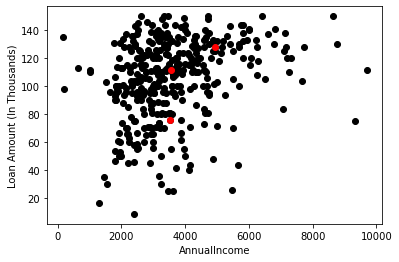

In [4]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
print(Centroids)
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [7]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in XD.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    print(X)
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print("Difference :: ",diff)
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-7-04abe5eca730>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-7-04abe5eca730>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583   348.000000  1042.122833  1074.259280   
1          66.0             3000  1931.995083   542.952116   510.098030   
2         120.0             2583  2348.013629   958.033402   928.043641   
3         141.0             6000  1069.079043  2459.170999  2490.848249   
4          95.0             2333  2598.209576  1208.119613  1177.153346   
..          ...              ...          ...          ...          ...   
376       128.0             5703   772.000000  2162.059204  2193.616420   
377       108.0             3232  1699.117712   309.025889   279.835666   
378        71.0             2900  2031.799695   642.309894   610.020491   
379        40.0             4106   829.680059   569.569135   597.086258   
380       133.0             4583   348.035918  1042.211591  1074.512913   

     Cluster  
0          1  
1          3  
2          3  
3          1  
4          3  
..       

<ipython-input-7-04abe5eca730>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-7-04abe5eca730>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583   891.967690   743.568309  1943.778541   
1          66.0             3000  2475.420231   840.716234   362.087873   
2         120.0             2583  2891.899678  1256.820144    60.154569   
3         141.0             6000   525.657230  2160.531232  3360.825067   
4          95.0             2333  3141.973914  1506.789191   306.463637   
..          ...              ...          ...          ...          ...   
376       128.0             5703   228.374543  1863.379239  3063.700410   
377       108.0             3232  2242.915407   607.748446   592.630512   
378        71.0             2900  2575.306087   940.411776   262.083776   
379        40.0             4106  1371.053272   274.401972  1467.758204   
380       133.0             4583   892.044220   743.730529  1943.859115   

     Cluster  
0          2  
1          3  
2          3  
3          1  
4          3  
..       

<ipython-input-7-04abe5eca730>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-7-04abe5eca730>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  1300.528102   740.911973  2097.817914   
1          66.0             3000  2883.945581   843.412714   515.567634   
2         120.0             2583  3300.486661  1259.402314   100.133328   
3         141.0             6000   118.860543  2157.898442  3514.865607   
4          95.0             2333  3550.557007  1509.407577   152.424564   
..          ...              ...          ...          ...          ...   
376       128.0             5703   180.790882  1860.755208  3217.741288   
377       108.0             3232  2651.502733   610.348589   746.670073   
378        71.0             2900  2983.848062   943.088618   415.450770   
379        40.0             4106  1779.174447   272.368633  1621.621382   
380       133.0             4583  1300.578080   741.061395  2097.896306   

     Cluster  
0          2  
1          3  
2          3  
3          1  
4          3  
..       

<ipython-input-7-04abe5eca730>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-7-04abe5eca730>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  1562.560484   721.153503  2153.033313   
1          66.0             3000  3145.950611   863.139703   570.727173   
2         120.0             2583  3562.527080  1279.192267   154.390405   
3         141.0             6000   147.385050  2138.126773  3570.083398   
4          95.0             2333  3812.593695  1529.185460    97.223254   
..          ...              ...          ...          ...          ...   
376       128.0             5703   442.646945  1840.979265  3272.962132   
377       108.0             3232  2913.542352   630.132994   801.886758   
378        71.0             2900  3245.861803   962.831739   470.604635   
379        40.0             4106  2041.004582   253.083706  1676.831187   
380       133.0             4583  1562.601548   721.311724  2153.108618   

     Cluster  
0          2  
1          3  
2          3  
3          1  
4          3  
..       

<ipython-input-7-04abe5eca730>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-7-04abe5eca730>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-7-04abe5eca730>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[

     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  1788.478731   685.237027  2175.604106   
1          66.0             3000  3371.882128   899.034568   593.232006   
2         120.0             2583  3788.458372  1315.113901   176.819542   
3         141.0             6000   372.082433  2102.202628  3592.653800   
4          95.0             2333  4038.532397  1565.111217    74.652995   
..          ...              ...          ...          ...          ...   
376       128.0             5703   668.512904  1805.053891  3295.531785   
377       108.0             3232  3139.479243   666.058149   824.457263   
378        71.0             2900  3471.796534   998.739650   493.107734   
379        40.0             4106  2266.851360   218.743700  1699.366792   
380       133.0             4583  1788.509599   685.401990  2175.679781   

     Cluster  
0          2  
1          3  
2          3  
3          1  
4          3  
..       

<ipython-input-7-04abe5eca730>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-7-04abe5eca730>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  1844.324439   671.572539  2175.604106   
1          66.0             3000  3427.720193   912.692875   593.232006   
2         120.0             2583  3844.304396  1328.777961   176.819542   
3         141.0             6000   427.850373  2088.535952  3592.653800   
4          95.0             2333  4094.377001  1578.777993    74.652995   
..          ...              ...          ...          ...          ...   
376       128.0             5703   724.355505  1791.387062  3295.531785   
377       108.0             3232  3195.324653   679.724139   824.457263   
378        71.0             2900  3527.636274  1012.401951   493.107734   
379        40.0             4106  2322.661588   205.846019  1699.366792   
380       133.0             4583  1844.354555   671.739736  2175.679781   

     Cluster  
0          2  
1          3  
2          3  
3          1  
4          3  
..       

<ipython-input-7-04abe5eca730>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-7-04abe5eca730>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  1872.354013   642.006450  2153.033313   
1          66.0             3000  3455.742856   942.241364   570.727173   
2         120.0             2583  3872.333416  1358.359097   154.390405   
3         141.0             6000   455.854894  2058.958966  3570.083398   
4          95.0             2333  4122.404365  1608.358231    97.223254   
..          ...              ...          ...          ...          ...   
376       128.0             5703   752.384798  1761.807908  3272.962132   
377       108.0             3232  3223.352791   709.305883   801.886758   
378        71.0             2900  3555.660044  1041.962187   470.604635   
379        40.0             4106  2350.667937   178.171134  1676.831187   
380       133.0             4583  1872.384189   642.181842  2153.108618   

     Cluster  
0          2  
1          3  
2          3  
3          1  
4          3  
..       

<ipython-input-7-04abe5eca730>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-7-04abe5eca730>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  1901.089918   601.461805  2123.100132   
1          66.0             3000  3484.469898   982.778347   540.816245   
2         120.0             2583  3901.068334  1398.885483   124.885324   
3         141.0             6000   484.571989  2018.413766  3540.148790   
4          95.0             2333  4151.137036  1648.900073   127.145007   
..          ...              ...          ...          ...          ...   
376       128.0             5703   781.121085  1721.264484  3243.025626   
377       108.0             3232  3252.086479   749.842006   771.952657   
378        71.0             2900  3584.388374  1082.505218   440.696031   
379        40.0             4106  2379.377003   141.996086  1646.896676   
380       133.0             4583  1901.120403   601.641321  2123.177296   

     Cluster  
0          2  
1          3  
2          3  
3          1  
4          3  
..       

<ipython-input-7-04abe5eca730>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-7-04abe5eca730>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  1901.089918   586.830411  2110.550395   
1          66.0             3000  3484.469898   997.404258   528.297012   
2         120.0             2583  3901.068334  1413.521304   112.533910   
3         141.0             6000   484.571989  2003.777769  3527.598978   
4          95.0             2333  4151.137036  1663.536911   139.694127   
..          ...              ...          ...          ...          ...   
376       128.0             5703   781.121085  1706.627853  3230.475798   
377       108.0             3232  3252.086479   764.478875   759.402879   
378        71.0             2900  3584.388374  1097.135460   428.178761   
379        40.0             4106  2379.377003   129.428461  1634.359864   
380       133.0             4583  1901.120403   587.013835  2110.627711   

     Cluster  
0          2  
1          3  
2          3  
3          1  
4          3  
..       

<ipython-input-7-04abe5eca730>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-7-04abe5eca730>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  1901.089918   577.200630  2102.034474   
1          66.0             3000  3484.469898  1007.030329   519.805451   
2         120.0             2583  3901.068334  1423.155963   104.172226   
3         141.0             6000   484.571989  1994.144066  3519.083082   
4          95.0             2333  4151.137036  1673.171517   148.209914   
..          ...              ...          ...          ...          ...   
376       128.0             5703   781.121085  1696.993513  3221.959999   
377       108.0             3232  3252.086479   774.113813   750.886965   
378        71.0             2900  3584.388374  1106.764672   419.688901   
379        40.0             4106  2379.377003   121.383824  1625.854686   
380       133.0             4583  1901.120403   577.387116  2102.111806   

     Cluster  
0          2  
1          3  
2          3  
3          1  
4          3  
..       

<ipython-input-7-04abe5eca730>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-7-04abe5eca730>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-7-04abe5eca730>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[

     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  1901.089918   572.319093  2097.817914   
1          66.0             3000  3484.469898  1011.915068   515.567634   
2         120.0             2583  3901.068334  1428.019849   100.133328   
3         141.0             6000   484.571989  1989.268905  3514.865607   
4          95.0             2333  4151.137036  1678.043388   152.424564   
..          ...              ...          ...          ...          ...   
376       128.0             5703   781.121085  1692.120467  3217.741288   
377       108.0             3232  3252.086479   778.982397   746.670073   
378        71.0             2900  3584.388374  1111.646808   415.450770   
379        40.0             4106  2379.377003   117.704971  1621.621382   
380       133.0             4583  1901.120403   572.502804  2097.896306   

     Cluster  
0          2  
1          3  
2          3  
3          1  
4          3  
..       

<ipython-input-7-04abe5eca730>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  1929.786213   549.706662  2085.250941   
1          66.0             3000  3513.174648  1034.521934   503.013025   
2         120.0             2583  3929.767475  1450.632322    87.961117   
3         141.0             6000   513.218472  1966.652040  3502.297968   
4          95.0             2333  4179.839177  1700.660175   164.991055   
..          ...              ...          ...          ...          ...   
376       128.0             5703   809.812174  1669.503528  3205.172854   
377       108.0             3232  3280.787556   801.598078   734.102962   
378        71.0             2900  3613.092818  1134.258480   402.898105   
379        40.0             4106  2408.079716   100.539911  1609.054208   
380       133.0             4583  1929.814743   549.895309  2085.330133   

     Cluster  
0          2  
1          3  
2          3  
3          1  
4          3  
..       

<ipython-input-7-04abe5eca730>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


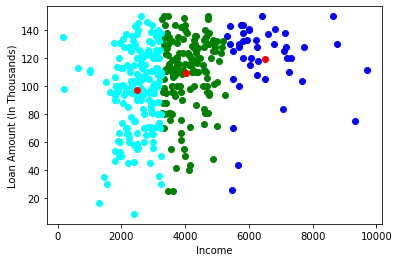

In [8]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

# k-means(built-in)

In [1]:
#K-means Clustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


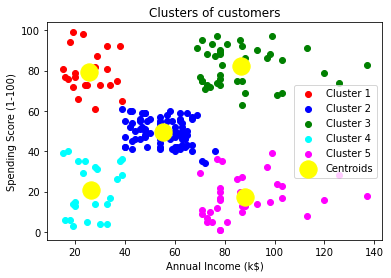

In [3]:
X = dataset.iloc[:, [3, 4]].values

# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierarchical Clistering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


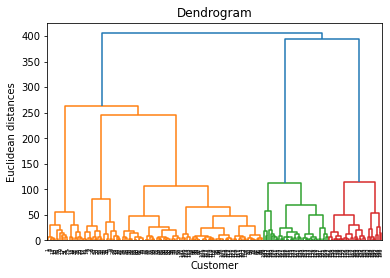

In [3]:
x = dataset.iloc[:,[3,4]].values

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidean distances")
plt.show()

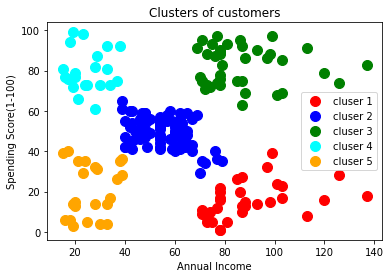

In [4]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = "red", label = "cluser 1")
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = "blue", label = "cluser 2")
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = "green", label = "cluser 3")
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = "cyan", label = "cluser 4")
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = "orange", label = "cluser 5")
plt.title("Clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()

# Density Based Clustering

In [10]:
#Density Based Clustering
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Read data from CSV file
data = pd.read_csv('blobs.csv')
data

,0,1
0,8.622185,1.935796
1,-4.736710,-7.970958
2,9.621222,0.925423
3,6.162095,-0.273254
4,8.697488,-1.057452
...,...,...
995,8.993880,2.203768
996,-5.082768,-9.644539
997,-6.252268,-8.412482
998,-5.479154,-10.536955


In [11]:
# Extract the features (assuming your CSV file has columns 'Feature1' and 'Feature2')
X = data.iloc[:,[0,1]].values
X

array([[  8.62218539,   1.93579579],
       [ -4.73670958,  -7.97095765],
       [  9.62122205,   0.92542315],
       ...,
       [ -6.2522678 ,  -8.412482  ],
       [ -5.479154  , -10.53695547],
       [  6.12055883,   0.96896287]])

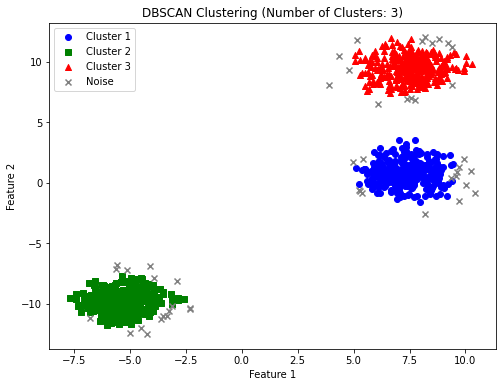

In [13]:
# DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5)
y_db = db.fit_predict(X)

# Number of clusters in labels, ignoring noise if present (-1)
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
     
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[y_db == 0][:, 0], X[y_db == 0][:, 1], c='blue', marker='o', label='Cluster 1')
plt.scatter(X[y_db == 1][:, 0], X[y_db == 1][:, 1], c='green', marker='s', label='Cluster 2')
plt.scatter(X[y_db == 2][:, 0], X[y_db == 2][:, 1], c='red', marker='^', label='Cluster 3')
plt.scatter(X[y_db == -1][:, 0], X[y_db == -1][:, 1], c='gray', marker='x', label='Noise')

# plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c='blue', marker='o', label='Cluster 1')
# plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c='green', marker='s', label='Cluster 2')
# plt.scatter(X[y_db == 2, 0], X[y_db == 2, 1], c='red', marker='^', label='Cluster 3')
# plt.scatter(X[y_db == -1, 0], X[y_db == -1, 1], c='gray', marker='x', label='Noise')


plt.legend(loc='best')
plt.title(f"DBSCAN Clustering (Number of Clusters: {n_clusters_})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Grid based clustering

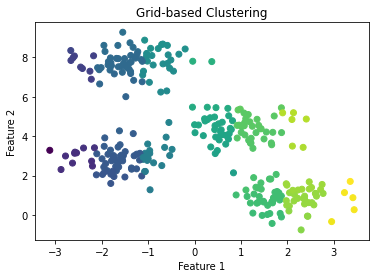

In [21]:
#Grid Based Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=.6, random_state=0)

# Set the grid size (you can adjust this based on your data distribution)
grid_size = 1.0

# Get the minimum and maximum values for x and y coordinates
x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 1].min(), data[:, 1].max()


# Create a grid by defining intervals using the minimum and maximum values
x_grid = np.arange(x_min, x_max + grid_size, grid_size)
y_grid = np.arange(y_min, y_max + grid_size, grid_size)


# Initialize labels array with zeros
labels = np.zeros(data.shape[0], dtype=int)
 

# Assign each data point to a grid cell based on its coordinates
for i, point in enumerate(data):
    x, y = point
    x_label = np.searchsorted(x_grid, x) - 1
    y_label = np.searchsorted(y_grid, y) - 1
    labels[i] = x_label * len(y_grid) + y_label


# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Grid-based Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()   

# Linear regression for single variable

In [23]:
#Linear regression using single variable
import pandas as pd 
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv("homeprices.csv")

In [24]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,595000
4,4000,760000
5,4100,810000


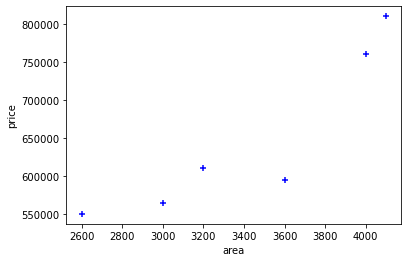

In [45]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color = 'blue', marker = '+')

In [27]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)
reg.coef_

array([167.30954677])

In [5]:
reg.intercept_

76692.3818707813

In [28]:
reg.predict([[3500]])

array([662275.79556413])

# Linear regression using multiple variables

In [36]:
#Linear regression using multiple variable
import pandas as pd 
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv("homeprices_multiple.csv")

In [37]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [42]:
median = df.bedrooms.median()
median

4.0

In [43]:
df.bedrooms = df.bedrooms.fillna(median)

In [44]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [47]:
x = df.iloc[:, [0,1,2]].values
y = df.iloc[:, 3].values
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [48]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [49]:
reg.intercept_

221323.00186540408

In [50]:
reg.predict([[2600, 3, 30]])

array([485900.45388978])

In [51]:
reg.predict([[2200, 2, 25]])

array([433845.18657815])